## Introduction

<b>Author:</b> Avonlea Fisher

This project explores message data from my Tinder account with Natural Language Processing. Tinder users can request a copy of their personal data, which is made available to them via e-mail in a json format. Visit https://account.gotinder.com/data to submit a request.

## Loading Data and Dependencies

In [293]:
import pandas as pd
import plotly.express as px
import operator
import datetime
import json

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.collocations import *
from nltk import FreqDist
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import chart_studio
import chart_studio.plotly as py

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import re

In [162]:
#Set credentials for saving plots to Chart Studio
username = [chartstudio username]
api_key = [chartstudio api key]
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
chart_studio.tools.set_config_file(world_readable=True, sharing='public')

In [2]:
#Load the data
with open('/Users/avonleafisher/Downloads/myData/data.json') as f:
    data = json.load(f)

## Exploring the Data

In [3]:
#Look at keys
data.keys()

dict_keys(['Spotify', 'Campaigns', 'Purchases', 'User', 'Photos', 'RoomsAndInteractions', 'Usage', 'Experiences', 'Messages'])

In [4]:
#Store messages in a separate dictionary
message_data = data['Messages']

In [5]:
#check number of conversations
len(message_data)

447

In [6]:
#view examples of message dictionaries
message_data[0]

{'match_id': 'Match 447', 'messages': []}

Each Tinder match is assigned a Match ID and a list of messages. If no messages were exchanged with the match, the messages list is empty. Below are some examples of non-empty message lists, which contain dictionaries for each message sent to the match.

In [7]:
message_data[177]['messages']

[{'to': 269,
  'from': 'You',
  'message': 'Heyyy,  I just came from new york to Iceland! Wanna  get together? It&apos;s my first time here and i&apos;m very excited but also hopelessly lost haha',
  'sent_date': 'Mon, 31 Dec 2018 01:53:58 GMT'},
 {'to': 269,
  'from': 'You',
  'message': 'Aw I am leaving on the 1st so maybe not 🙁 I was looking for a nye buddy. Oh well, sleep well!',
  'sent_date': 'Mon, 31 Dec 2018 02:06:51 GMT'},
 {'to': 269,
  'from': 'You',
  'message': 'Thanks, I&apos;ll try! ❤',
  'sent_date': 'Mon, 31 Dec 2018 02:20:57 GMT'},
 {'to': 269,
  'from': 'You',
  'message': 'I&apos;ve been living there for the past couple months, but I&apos;m moving to Madrid tomorrow 🙂',
  'sent_date': 'Mon, 31 Dec 2018 10:32:30 GMT'}]

In [8]:
message_data[252]['messages']

[{'to': 194,
  'from': 'You',
  'message': 'Je suis à Minneapolis ',
  'sent_date': 'Sun, 14 Oct 2018 22:28:05 GMT'},
 {'to': 194,
  'from': 'You',
  'message': 'J&apos;etais voyager mon ami tradacteur. ',
  'sent_date': 'Sun, 14 Oct 2018 22:29:23 GMT'},
 {'to': 194,
  'from': 'You',
  'message': 'Non c&apos;est sediment questions je visite. ',
  'sent_date': 'Sun, 14 Oct 2018 22:56:15 GMT'}]

In [11]:
#create messages list
message_lists = []
for i in message_data:
    if len(i['messages']) > 0:
        message_lists.append(i['messages'])
        
messages = []       
for x in range(0, len(message_lists)):
    msg = message_lists[x]
    for y in range(0, len(msg)):
        messages.append(msg[y]['message'])

In [12]:
#check item in messages list
messages[7]

'Vivo en Chueca, y tu?'

In [13]:
#create stopwords list and update it with common 'words' that 
#are unrelated to the content of the conversation

stopwords_list = list(stopwords.words('english'))

for w in ['http', 'com', 'www', 'colon', 'sol', 'gif', 
          'giphy', 'rsquo', 'rsquo', 'media',
          'apos', 'width', 'https', 'height', 
          'lpar', 'rpar', 'quot']:
    
            stopwords_list.append(w)

In [14]:
stopwords_list = [w.lower() for w in stopwords_list]

In [113]:
def clean_words(text):
    
    joined_text = "".join(text) 
    joined_text = re.sub('[^A-Za-z ]+', ' ', joined_text)
    
    words = [WordNetLemmatizer().lemmatize(word) for word in joined_text]
    words = word_tokenize(joined_text)
    
    
    clean_words_list = []
    
    for word in words:
        if word.lower() not in stopwords_list:            
            clean_words_list.append(word.lower())
    
    return clean_words_list
cleaned_words = clean_words(messages)

### Wordcloud

In [114]:
freqdist = FreqDist(cleaned_words)

In [115]:
sorted_freqs = sorted(freqdist.items(), key=operator.itemgetter(1), reverse=True)

In [25]:
mask = np.array(Image.open("/Users/avonleafisher/Desktop/heart_010.jpg"))

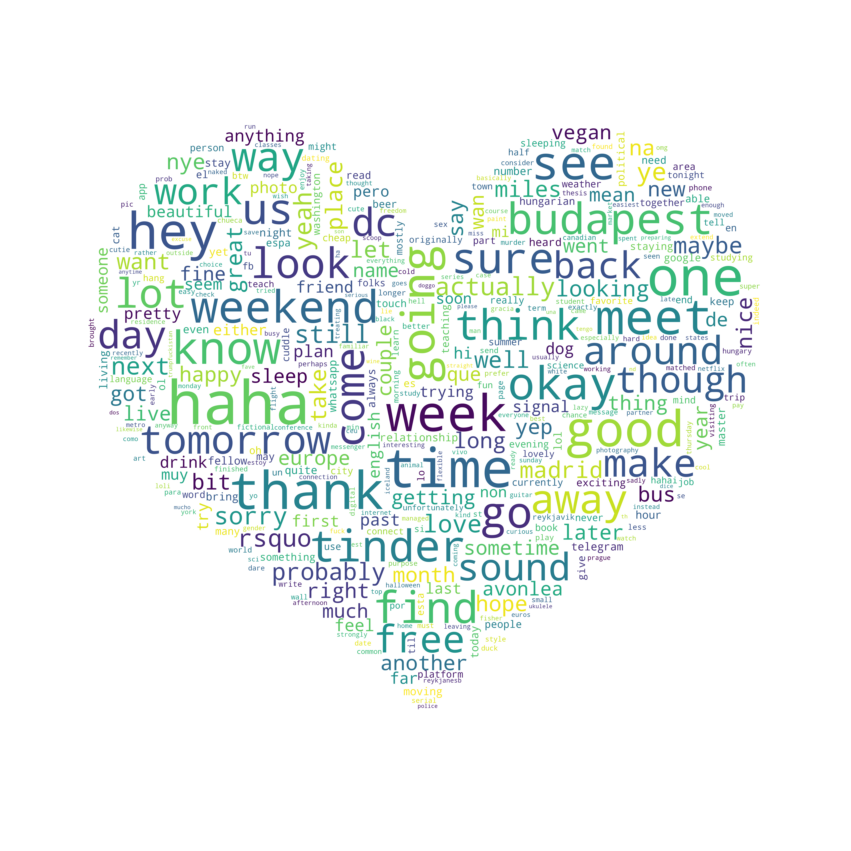

In [62]:
wc = WordCloud(background_color="white", mask=mask, max_words=400, 
               max_font_size =358, collocations=False)

clean_string = '.'.join(cleaned_words)
wc.generate(clean_string)

f = plt.figure(figsize=(15,17))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Bigram Barplot

In [117]:
def get_bigrams(cleaned_words):
    
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(clean_data)
    scored = finder.score_ngrams(bigram_measures.raw_freq)
        
    bigrams = []
    freqs = []
     
    for bigram in scored[:40]:
        bigrams.append(str(bigram[0]))
        freqs.append(bigram[1])
    
    return bigrams, freqs

In [275]:
bigrams, freqs = plot_bigrams(cleaned_words)

In [276]:
d = {'Bigram': bigrams, 'Frequency': freqs}
df = pd.DataFrame(data=d)

In [279]:
fig = px.bar(df, 'Bigram', 'Frequency', 
              title='Word Pairing Frequency', 
              width=900, height=550, color='Frequency')

fig.update(layout_coloraxis_showscale=False)

fig.update_layout(title_font_size=19,
    font_color="rebeccapurple",
    title_font_family="Courier",
    title_font_color="rebeccapurple"
)

fig.update_xaxes(title_font=dict(size=17, family='Courier'),
                 tickangle=45, tickfont=dict(family='Silom', color='rebeccapurple', size=11))

fig.update_yaxes(title_font=dict(size=17, family='Courier'),
                tickfont=dict(family='Silom', color='rebeccapurple', size=11))
fig.show()

In [280]:
plot_url = py.plot(fig, filename='Tinder Bigrams', auto_open='True')

### Sentiment Plot

In [205]:
message_df = pd.DataFrame({'Messages': messages})

In [218]:
analyser = SentimentIntensityAnalyzer()

In [224]:
neg = []
neu = []
pos = []
compound = []


for m in messages:
    score = analyser.polarity_scores(m)
    neg.append(score['neg'])
    neu.append(score['neu'])
    pos.append(score['pos'])
    compound.append(score['compound'])

In [265]:
df = pd.DataFrame({'Sentiment': ['Negative', 'Positive', 'Neutral', 'Compound'],
                 'Score Sum': [sum(neg), sum(pos), sum(neu), sum(compound)]})

In [270]:
fig = px.bar(df, 'Sentiment', 'Score Sum', 
             title='Message Sentiment Score Sums', 
             width=900, height=550)

fig.update_traces(marker_color='#e377c2')
fig.update_layout(title_font_size=19,
    font_color="rebeccapurple",
    title_font_family="Courier",
    title_font_color="rebeccapurple"
)

fig.update_xaxes(title='Sentiment' ,title_font=dict(size=17, family='Courier'),
                 tickfont=dict(family='Silom', color='rebeccapurple', size=11))

fig.update_yaxes(title = 'Score Sum', title_font=dict(size=17, family='Courier'),
                tickfont=dict(family='Silom', color='rebeccapurple', size=11))
fig.show()

In [271]:
plot_url = py.plot(fig, filename='Sentiment Sums', auto_open='True')